In [ ]:
### In this example script, I use the SigmaZ routines to calculate various AMOC, and transport
### diagnostics in models. This example shows a calculation along the OSNAP observational array 
### cross-section. Various commented-out sections show how to use the tools with different models.
### The package accepts and outputs xarray datafiles by defauly, but a numpy_algo flag is provided 
### in case numpy input data is being used  or if it is preferred (set numpy_algo=True in the examples
### below to see how it works). If calc_rho_flag=True then rho will be calculated from T and S, 
### otherwise it will be read from file. If mom_gridwidth_algo=True then the standard mom gridwidth 
### variables will be used to calculate along-section distance, otherwise it will be calculated offline
### from the section lat-lon information. 
###
### This example shows a calculation along the OSNAP section using model data, before then using the same
### tools to calculate the same diagnostics on the gridded observational output from the OSNAP array. 
### 
### The diagnostics use Raphael Dussin's sectionate tool, which outputs a model cross-section along any 
### chosen coordinate set, be they even or uneven. The diagnostics can then be used to calculate:
### - a SigmaZ diagram
### - Overturning streamfunction, maxAMOC timeseries and spectra
### - Heat and Freshwater transports, including their MOC and gyre contributions
### - cross-sections of velocity, T, S, and rho, with the maxAMOC streamline overlaid

# First apply the SigmaZ routines to model data:

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '/home/Matthew.Thomas/python_code/python_pkgs/SigmaZ_diag/SigmaZ_diag')
import om4labs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs
from numba import njit
import sectionate
from glob import glob
import momlevel
import SigmaZ_funcs
from xhistogram.xarray import histogram
import xrft

/vftmp/Matthew.Thomas/pid18533/ipykernel_10242/2452648607.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid.geolon_c,grid.geolat_c,grid.deptho)


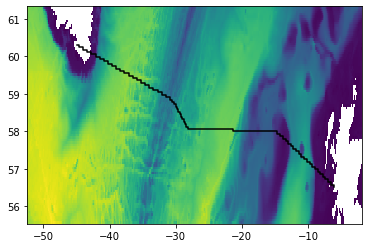

In [2]:
### Uncomment this to work with the CM4 hires (p125) config
dir_base="/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/"
file_str_identifier="*.0196*"  # Examples: *.0196* for that year stamp; "*.0[1-2]*" for years 100-299; 
z_layer_var="z_l"
section_node_lats=[60.3000, 58.8600, 58.0500, 58.0000, 56.5000] ### OSNAP East section
section_node_lons=[-44.9000, -30.5400, -28.0000, -14.7000, -5.9300] ### OSNAP East section
# section_node_lats=[52.0166, 52.6648, 53.5577, 58.8944, 60.4000]  ### OSNAP West section
# section_node_lons=[-56.8775, -52.0956, -49.8604, -47.6107, -44.8000]  ### OSNAP West section
calc_rho_flag=True
numpy_algo=False
mom_gridwidth_algo=False
dsT, transp, rho, xsec, ysec, cell_area, so, thetao, section_gridwidth, grid = SigmaZ_funcs.SigmaZ_diag_ReadData(dir_base,section_node_lons,section_node_lats,file_str_identifier,calc_rho_flag,mom_gridwidth_algo=mom_gridwidth_algo)
plt.pcolormesh(grid.geolon_c,grid.geolat_c,grid.deptho)
plt.plot(xsec,ysec,color="k")

In [ ]:
# ### Uncomment this to work with the CM4 p25 config
# ### This currently doesn't work because there is no 'z_i' in the p25 run
# dir_vars="gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly_z/ts/monthly/5yr/"
# dir_grid="gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly_z/ocean_monthly_z.static.nc"
# dir_base="/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p25_v7/"
# file_str_identifier="*.0196*" # Examples: *.0196* for that year stamp; "*.0[1-2]*" for years 100-299; 
# z_layer_var="z_l"
# z_inter_var="z_l"
# section_node_lats=[60.3000, 58.8600, 58.0500, 58.0000, 56.5000] ### OSNAP East section
# section_node_lons=[-44.9000, -30.5400, -28.0000, -14.7000, -5.9300] ### OSNAP East section
# # section_node_lats=[52.0166, 52.6648, 53.5577, 58.8944, 60.4000]  ### OSNAP West section
# # section_node_lons=[-56.8775, -52.0956, -49.8604, -47.6107, -44.8000]  ### OSNAP West section
# calc_rho_flag=True
# numpy_algo=False
# mom_gridwidth_algo=False
# dsT, transp, rho, xsec, ysec, cell_area, so, thetao, section_gridwidth, grid = SigmaZ_funcs.SigmaZ_diag_ReadData(dir_base,section_node_lons,section_node_lats,file_str_identifier,calc_rho_flag,dir_vars=dir_vars,dir_grid=dir_grid,z_inter_var=z_inter_var,mom_gridwidth_algo=mom_gridwidth_algo)
# plt.pcolormesh(grid.geolon_c,grid.geolat_c,grid.deptho)
# plt.plot(xsec,ysec,color="k")

In [ ]:
# # ### Uncomment this to work with Tony Rosati's DA run data instead
# dir_base="/archive/Feiyu.Lu/SPEAR/SPEAR_c96_o1_ECDA_J11/pp_ensemble/ocean_z/"
# file_str_identifier="*" 
# z_layer_var="z_l"
# dir_vars="ts/monthly/30yr/"
# dir_grid="ocean_z.static.nc"
# section_node_lats=[60.3000, 58.8600, 58.0500, 58.0000, 56.5000] ### OSNAP East section
# section_node_lons=[-43.9000, -30.5400, -28.0000, -14.7000, -4.000] ### OSNAP East section
# # section_node_lats=[52.0166, 52.6648, 53.5577, 58.8944, 60.5000]  ### OSNAP West section
# # section_node_lons=[-56.8775, -52.0956, -49.8604, -47.6107, -43]  ### OSNAP West section
# time_limits=['2014','2020']
# calc_rho_flag=True
# numpy_algo=False
# mom_gridwidth_algo=False
# dsT, transp, rho, xsec, ysec, cell_area, so, thetao, section_gridwidth, grid = SigmaZ_funcs.SigmaZ_diag_ReadData(dir_base,section_node_lons,section_node_lats,file_str_identifier,calc_rho_flag,dir_vars,dir_grid,time_limits=time_limits,mom_gridwidth_algo=mom_gridwidth_algo,decode_times_flag=True)
# plt.pcolormesh(grid.geolon_c,grid.geolat_c,grid.deptho)
# plt.plot(xsec,ysec,color="k")

In [ ]:
# ### Uncomment this to work with Rong Zhang's RDC run 
# dir_base="/archive/roz/cm2.hi/CM2.hi_Control_1990_E01_rs_wind_cars_woa_newtopog/gfdl.ncrc3-intel15-prod/pp/ocean/"
# file_str_identifier="*.0076*" # Examples: *.0196* for that year stamp; "*.0[1-2]*" for years 100-299; 
# z_layer_var="st_ocean"
# dir_vars="ts/monthly/5yr/"
# dir_grid="ocean.static.nc"
# section_node_lats=[60.5, 58.8600, 58.0500, 58.0000, 56.5000] ### OSNAP East section
# section_node_lons=[-44, -30.5400, -28.0000, -14.7000, -3] ### OSNAP East section
# calc_rho_flag=True
# numpy_algo=False
# dsT, transp, rho, xsec, ysec, cell_area, so, thetao, section_gridwidth, grid = SigmaZ_funcs.SigmaZ_diag_ReadData(dir_base,section_node_lons,section_node_lats,file_str_identifier,calc_rho_flag,dir_vars,dir_grid,z_layer_var,z_inter_var="st_edges_ocean",u_transport_var="tx_trans",v_transport_var="ty_trans",theta_var="temp",salt_var="salt",x_hpoint_1Dvar="xt_ocean",x_qpoint_1Dvar="xu_ocean",y_hpoint_1Dvar="yt_ocean",y_qpoint_1Dvar="yu_ocean",lons_tpoint="geolon_t",lats_tpoint="geolat_t",lons_cpoint="geolon_c",lats_cpoint="geolat_c",mom_gridwidth_algo=False)
# transp=transp*1030*1e6
# plt.pcolormesh(grid.geolon_c,grid.geolat_c,grid.kmt)
# plt.plot(xsec,ysec,color="k")

In [ ]:
# ### Uncomment this to work with the CM4 pi CMIP6 contribution
# dir_base="/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/"
# dir_vars="gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_z/ts/monthly/5yr/"
# dir_grid="gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_z/ocean_monthly_z.static.nc"
# z_layer_var="z_l"
# z_inter_var="z_i"
# file_str_identifier="*0196*"  # Examples: *.0196* for that year stamp; "*.0[1-2]*" for years 100-299; 
# section_node_lats=[60.3000, 58.8600, 58.0500, 58.0000, 56.5000] ### OSNAP East section
# section_node_lons=[-44.9000, -30.5400, -28.0000, -14.7000, -5.0300] ### OSNAP East section
# calc_rho_flag=True
# numpy_algo=False
# mom_gridwidth_algo=False
# dsT, transp, rho, xsec, ysec, cell_area, so, thetao, section_gridwidth, grid = SigmaZ_funcs.SigmaZ_diag_ReadData(dir_base,section_node_lons,section_node_lats,file_str_identifier,calc_rho_flag,dir_vars=dir_vars,dir_grid=dir_grid,mom_gridwidth_algo=mom_gridwidth_algo)
# plt.pcolormesh(grid.geolon_c,grid.geolat_c,grid.deptho)
# plt.plot(xsec,ysec,color="k")

In [3]:
### Set a few variables. 
rholims=[21,28.1]; # Density range for the rebinning into the SigmaZ diagram
nrho=500;  # number of density bins between the two rholims
rebin_depth=np.arange(100,6600,100) # regularly spaced rebinned z-layers for the SigmaZ diagram
depth=dsT[z_layer_var]

In [4]:
%%time
### If numpy_algo is True then the values need to be output, and cell_area needs to be expanded if mom_gridwidth_algo is True 
if numpy_algo:
    ### convert xarray output to numpy values (Ensure that matrix dimensions are (time,depth,dist))
    transp=transp.values
    rho=rho.values
    cell_area=np.repeat(np.expand_dims(cell_area.values,axis=0),np.shape(dsT.time)[0],axis=0)
    cell_area[np.isnan(cell_area)]=0
    depth=depth.values
    if calc_rho_flag:
        so=so.values
        thetao=thetao.values
else:
    ### This can be commented out, but it makes things faster when this output is used in multiple different operations 
    transp=transp.load()
    rho=rho.load()
    cell_area=cell_area.load()
    if calc_rho_flag:
        so=so.load()
        thetao=thetao.load()

CPU times: user 1min 5s, sys: 6.49 s, total: 1min 11s
Wall time: 2min 25s


In [5]:
ty_z_rho, ty_z_rho_rebin, rho0_bounds, rho0_ref = SigmaZ_funcs.SigmaZ_diag_ComputeDiag(transp,rho,rholims,depth,rebin_depth,nrho,numpy_algo=numpy_algo,z_layer_var=z_layer_var)

/home/Matthew.Thomas/python_code/python_pkgs/SigmaZ_diag/SigmaZ_diag/SigmaZ_funcs.py:266: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ch1=ax0.pcolormesh(rho0_bounds[0:-1],-depth,ty_z_rho.mean(axis=0)/rho0/1e6,shading='flat',vmin=-5e-1,vmax=5e-1,cmap='RdBu_r')


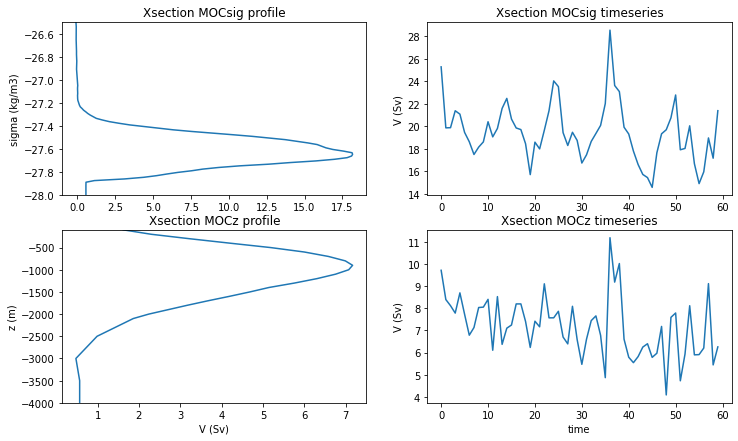

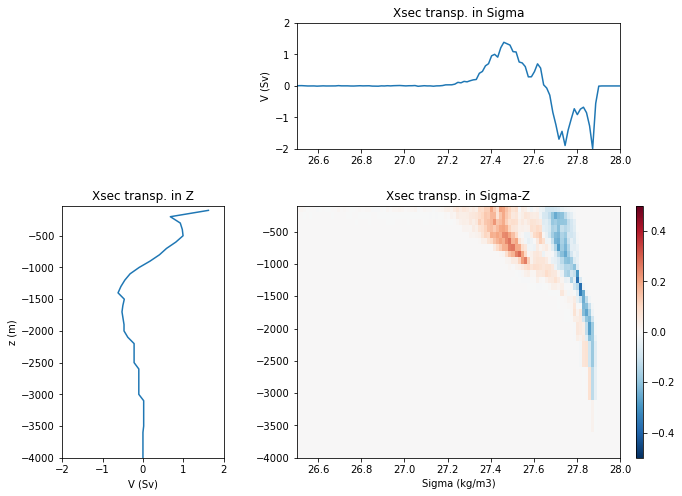

In [6]:
AMOCz, AMOCrho, ty_z, ty_rho, AMOCz_ts, AMOCrho_ts = SigmaZ_funcs.SigmaZ_diag_PlotDiag(ty_z_rho_rebin,rebin_depth,rho0_ref,rho0_bounds,numpy_algo=numpy_algo)

In [7]:
%%time
if calc_rho_flag:
    MOCsig_MHTMFT, MOCz_MHTMFT, MOCsigz_MHTMFT = SigmaZ_funcs.SigmaZ_diag_computeMFTMHT(transp,so,thetao,rho,cell_area,rho0_bounds,depth,rebin_depth=rebin_depth,rho_dim='rho_bin',z_dim=z_layer_var,annual_mean_flag=False,plot_flag=True)

TypeError: SigmaZ_diag_computeMFTMHT() got an unexpected keyword argument 'rebin_depth'

NameError: name 'MOCsigz_MHTMFT' is not defined

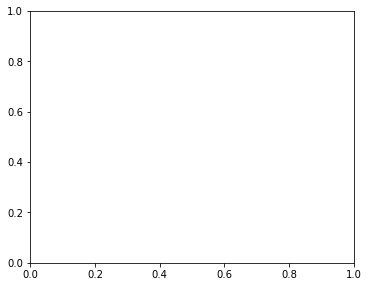

In [8]:
### Here is an example showing that you can plot a SigmaZ plot of freshwater transport. 
### The equivalent plot for heat transport is done the same way -- change MFT to MFT and Vso_z_rho to Vthetao (and some unit conversions)
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1,2], wspace=0.3,
                         hspace=0.3, height_ratios=[1, 2])
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(spec[3])
ch1=ax0.pcolormesh(rho0_bounds[0:-1],-rebin_depth,MOCsigz_MHTMFT.Vso_z_rho.mean(axis=0)/1035/1e6,vmin=-2.5e-3,vmax=2.5e-3,shading='flat',cmap='RdBu_r')
ax0.set_title('Xsec FW transp. in Sigma-Z')
ax0.set_xlabel('Sigma (kg/m3)')
plt.xlim([26.5,28]), plt.ylim( [-4000,0] )
box = ax0.get_position()
ax0.set_position([box.x0*1, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1 + box.width * 1.05, box.y0, 0.01, box.height])
plt.colorbar(ch1, cax = axColor, orientation="vertical")
ax1 = fig.add_subplot(spec[1])
ax1.plot(rho0_ref,MOCsig_MHTMFT.MFT_zonmean_rho.mean(axis=0)/1035/1e6,label='TOTrho')
ax1.plot(rho0_ref,MOCsig_MHTMFT.MFT_MOCrho.mean(axis=0)/1035/1e6,label='MOCrho')
ax1.plot(rho0_ref,MOCsig_MHTMFT.MFT_GYRErho.mean(axis=0)/1035/1e6,label='GYRErho')
ax1.legend(loc='lower left')
ax1.set_title('Xsec FW transp. in Sigma')
ax1.set_ylabel('MFT (Sv)')
plt.xlim([26.5,28]), #plt.ylim( [-2,2] )
ax2 = fig.add_subplot(spec[2])
ax2.plot(MOCz_MHTMFT.MFT_zonmean_z.mean(axis=0)/1035/1e6,-rebin_depth)
ax2.plot(MOCz_MHTMFT.MFT_MOCz.mean(axis=0)/1035/1e6,-rebin_depth)
ax2.plot(MOCz_MHTMFT.MFT_GYREz.mean(axis=0)/1035/1e6,-rebin_depth)
ax2.set_title('Xsec FW transp. in Z')
ax2.set_xlabel('MFT (Sv)')
ax2.set_ylabel('z (m)')    
plt.ylim([-4000,0]), #plt.xlim([-2,2]),

In [ ]:
### Plot the property cross-sections. If calc_rho_flag=False then it will only show V and rho
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(4,1,1)
if numpy_algo: cell_area=cell_area[0,:,:]
blah=ax.contourf(np.cumsum(section_gridwidth),-dsT[z_layer_var],transp.mean(axis=0)/cell_area/1035,levels=np.linspace(-.3,.3,num=31),extend='both',cmap='RdBu_r')
plt.colorbar(blah)
ax.set_title('velocity across section')
ax.set_ylabel('Depth (m)')
plt.ylim([-4000,0])
ax = fig.add_subplot(4,1,2)
vlah=ax.contourf(np.cumsum(section_gridwidth),-dsT[z_layer_var],rho.mean(axis=0),levels=np.linspace(26,28,num=41))
if numpy_algo==False: maxAMOC_contour=ax.contour(np.cumsum(section_gridwidth),-dsT[z_layer_var],rho.mean(axis=0),levels=[AMOCrho.mean('time').idxmax('rho_bin')],colors=["red"])
plt.colorbar(vlah)
ax.set_title('Density along section)')
ax.set_ylabel('Depth (m)')
plt.ylim([-4000,0])
if calc_rho_flag:
    ax = fig.add_subplot(4,1,3)
    blah=ax.contourf(np.cumsum(section_gridwidth),-dsT[z_layer_var],thetao.mean(axis=0),levels=np.linspace(-1,12,num=27))
    plt.colorbar(blah)
    ax.set_title('Temperature along section')
    ax.set_ylabel('Depth (m)')
    plt.ylim([-4000,0])
    ax = fig.add_subplot(4,1,4)
    blah=ax.contourf(np.cumsum(section_gridwidth),-dsT[z_layer_var],so.mean(axis=0),levels=np.linspace(34,35.5,num=31),extend='both')
    plt.colorbar(blah)
    ax.set_title('Salinity along section')
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Distance')
    plt.ylim([-4000,0])

In [ ]:
### Plot power spectral density of MOCrho
if numpy_algo==False:
    time_reg=np.arange(0,len(AMOCrho_ts.time))*30.417 # xrft doesn't work on irregularly-spaced coordinates, so we have to make a approximation for time that is regular
    AMOCrho_ts['time']=time_reg
    MOCrho_psd=xrft.xrft.power_spectrum(AMOCrho_ts/1030/1e6,detrend='linear')
    wavenumber_cutoff=800 # days
    plt.plot(1/MOCrho_psd.where(MOCrho_psd.freq_time>1/wavenumber_cutoff).freq_time,MOCrho_psd.where(MOCrho_psd.freq_time>1/wavenumber_cutoff))
    plt.xlabel('wavenumber period (days)')
    plt.ylabel('PSD')
    plt.title('MOC spectral density across section')

# Now use the same functions on the OSNAP observational data:

In [ ]:
### Read in OSNAP Data:
ds_OSNAP = xr.open_dataset("/home/Matthew.Thomas/work/OSNAP/OSNAP_Gridded_TSV_201408_201805_2021.nc", decode_times=True)
ds_OSNAP_streamfunction = xr.open_dataset("/work/m2t/From_Rong/OSNAP_Streamfunction_201408_201805_2020_new.nc", decode_times=True)
Area=ds_OSNAP.AREA_OSNAP
Time_OSNAP=ds_OSNAP.TIME_OSNAP
depth_OSNAP=ds_OSNAP.DEPTH_OSNAP
Transp_OSNAP=ds_OSNAP.VELO_OSNAP*Area
TEMP_OSNAP=ds_OSNAP.TEMP_OSNAP
PSAL_OSNAP=ds_OSNAP.PSAL_OSNAP
PD_OSNAP = momlevel.derived.calc_rho(TEMP_OSNAP,PSAL_OSNAP,0)-1000
earth_radius=6371  # in km
section_gridwidth_OSNAP=earth_radius*sectionate.distance_on_unit_sphere(ds_OSNAP.LAT_OSNAP[0:-1],ds_OSNAP.LON_OSNAP.values[0:-1],ds_OSNAP.LAT_OSNAP[1:],ds_OSNAP.LON_OSNAP[1:])
numpy_algo=False

In [ ]:
# ### Select the OSNAP East section 
PD_OSNAP=PD_OSNAP.rename('rho')
PD_OSNAP_east=PD_OSNAP.isel(x=slice(80,len(PD_OSNAP.x)))
TEMP_OSNAP_east=TEMP_OSNAP.isel(x=slice(80,len(PD_OSNAP.x)))
PSAL_OSNAP_east=PSAL_OSNAP.isel(x=slice(80,len(PD_OSNAP.x)))
Area_east=Area.isel(x=slice(80,len(PD_OSNAP.x)))
Transp_OSNAP_east=Transp_OSNAP.isel(x=slice(80,len(PD_OSNAP.x)))
section_gridwidth_OSNAP_east=section_gridwidth_OSNAP.isel(x=slice(79,len(PD_OSNAP.x)))

In [ ]:
if numpy_algo:
    depth_OSNAP=depth_OSNAP.values
    PD_OSNAP_east=PD_OSNAP_east.values
    TEMP_OSNAP_east=TEMP_OSNAP_east.values
    PSAL_OSNAP_east=PSAL_OSNAP_east.values
    Area_east=np.repeat(Area_east.values[np.newaxis,...],len(ds_OSNAP.TIME_OSNAP), axis=0)
    Transp_OSNAP_east=Transp_OSNAP_east.values
    section_gridwidth_OSNAP_east=section_gridwidth_OSNAP_east.values

In [ ]:
### Calculate SigmaZ diagrams
ty_z_rho_OSNAP_east, ty_z_rho_rebin_OSNAP_east, rho0_bounds, rho0_ref = SigmaZ_funcs.SigmaZ_diag_ComputeDiag(Transp_OSNAP_east,PD_OSNAP_east,rholims,depth_OSNAP,rebin_depth,nrho,z_layer_var='z',dist_var='x',numpy_algo=numpy_algo)

In [ ]:
### Plot SigmaZ diagram and streamfunctions along OSNAP East
AMOCz_east_OSNAP, AMOCrho_east_OSNAP, ty_z_east_OSNAP, ty_rho_east_OSNAP, AMOCz_east_OSNAP_ts, AMOCrho_east_OSNAP_ts = SigmaZ_funcs.SigmaZ_diag_PlotDiag(ty_z_rho_rebin_OSNAP_east*1030,rebin_depth,rho0_ref,rho0_bounds,numpy_algo=numpy_algo)

In [ ]:
### Calculate Heat and Freshwater Transports along OSNAP East and West
MOCsig_MHTMFT_OSNAP_east, MOCz_MHTMFT_OSNAP_east, MOCsigz_MHTMFT_OSNAP_east = SigmaZ_funcs.SigmaZ_diag_computeMFTMHT(Transp_OSNAP_east*1030,PSAL_OSNAP_east,TEMP_OSNAP_east,PD_OSNAP_east,Area_east,rho0_bounds,depth_OSNAP,rebin_depth=rebin_depth,z_dim='z',dist_var='x',plot_flag=True)

In [ ]:
### SigmaZ plot of freshwater transport. 
### The equivalent plot for heat transport is done the same way -- change MFT to MFT and Vso_z_rho to Vthetao (and change some unit conversions)
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1,2], wspace=0.3,
                         hspace=0.3, height_ratios=[1, 2])
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(spec[3])
ch1=ax0.pcolormesh(rho0_bounds[0:-1],-rebin_depth,MOCsigz_MHTMFT_OSNAP_east.Vso_z_rho.mean(axis=0)/1035/1e6,vmin=-2.5e-3,vmax=2.5e-3,shading='flat',cmap='RdBu_r')
ax0.set_title('Xsec FW transp. in Sigma-Z')
ax0.set_xlabel('Sigma (kg/m3)')
plt.xlim([26.5,28]), plt.ylim( [-4000,0] )
box = ax0.get_position()
ax0.set_position([box.x0*1, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1 + box.width * 1.05, box.y0, 0.01, box.height])
plt.colorbar(ch1, cax = axColor, orientation="vertical")
ax1 = fig.add_subplot(spec[1])
ax1.plot(rho0_ref,MOCsig_MHTMFT_OSNAP_east.MFT_zonmean_rho.mean(axis=0)/1035/1e6,label='TOTrho')
ax1.plot(rho0_ref,MOCsig_MHTMFT_OSNAP_east.MFT_MOCrho.mean(axis=0)/1035/1e6,label='MOCrho')
ax1.plot(rho0_ref,MOCsig_MHTMFT_OSNAP_east.MFT_GYRErho.mean(axis=0)/1035/1e6,label='GYRErho')
ax1.legend(loc='lower left')
ax1.set_title('Xsec FW transp. in Sigma')
ax1.set_ylabel('MFT (Sv)')
plt.xlim([26.5,28]), #plt.ylim( [-2,2] )
ax2 = fig.add_subplot(spec[2])
ax2.plot(MOCz_MHTMFT_OSNAP_east.MFT_zonmean_z.mean(axis=0)/1035/1e6,-rebin_depth)
ax2.plot(MOCz_MHTMFT_OSNAP_east.MFT_MOCz.mean(axis=0)/1035/1e6,-rebin_depth)
ax2.plot(MOCz_MHTMFT_OSNAP_east.MFT_GYREz.mean(axis=0)/1035/1e6,-rebin_depth)
ax2.set_title('Xsec FW transp. in Z')
ax2.set_xlabel('MFT (Sv)')
ax2.set_ylabel('z (m)')    
plt.ylim([-4000,0]), #plt.xlim([-2,2]),

In [ ]:
### Plot cross-sections of V, T, S and Rho along OSNAP East and West
fig = plt.figure(figsize=(10,12))
if numpy_algo: Area_east=Area_east[0,:,:]
ax = fig.add_subplot(4,1,1)
blah=ax.contourf(np.cumsum(section_gridwidth_OSNAP_east),-depth_OSNAP,Transp_OSNAP_east.mean(axis=0)/Area_east,levels=np.linspace(-.3,.3,num=31),extend='both',cmap='RdBu_r')
plt.colorbar(blah)
ax.set_title('velocity across OSNAP East')
ax.set_ylabel('Depth (m)')
plt.ylim([-4000,0])
ax = fig.add_subplot(4,1,2)
vlah=ax.contourf(np.cumsum(section_gridwidth_OSNAP_east),-depth_OSNAP,PD_OSNAP_east.mean(axis=0),levels=np.linspace(26,28,num=41))
if numpy_algo==False: maxAMOC_contour=ax.contour(np.cumsum(section_gridwidth_OSNAP_east),-depth_OSNAP,PD_OSNAP_east.mean(axis=0),levels=[AMOCrho_east_OSNAP.mean('time').idxmax('rho_bin')],colors=["red"])
plt.colorbar(vlah)
ax.set_title('Density along OSNAP East')
ax.set_ylabel('Depth (m)')
plt.ylim([-4000,0])
ax = fig.add_subplot(4,1,3)
blah=ax.contourf(np.cumsum(section_gridwidth_OSNAP_east),-depth_OSNAP,TEMP_OSNAP_east.mean(axis=0),levels=np.linspace(-1,12,num=27))
plt.colorbar(blah)
ax.set_title('Temperature along OSNAP East')
ax.set_ylabel('Depth (m)')
plt.ylim([-4000,0])
ax = fig.add_subplot(4,1,4)
blah=ax.contourf(np.cumsum(section_gridwidth_OSNAP_east),-depth_OSNAP,PSAL_OSNAP_east.mean(axis=0),levels=np.linspace(34,35.5,num=31),extend='both')
plt.colorbar(blah)
ax.set_title('Salinity along OSNAP East')
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Distance')
plt.ylim([-4000,0])

In [ ]:
### Plot power spectral density of MOCrho
if numpy_algo==False:
    time_reg=np.arange(0,len(AMOCrho_east_OSNAP_ts.time))*30.417 # xrft doesn't work on irregularly-spaced coordinates, so we have to make a approximation for time that is regular
    AMOCrho_east_OSNAP_ts['time']=time_reg
    MOCrho_OSNAP_east_psd=xrft.xrft.power_spectrum(AMOCrho_east_OSNAP_ts/1030/1e6,detrend='linear')
    wavenumber_cutoff=800 # days
    plt.plot(1/MOCrho_OSNAP_east_psd.where(MOCrho_OSNAP_east_psd.freq_time>1/wavenumber_cutoff).freq_time,MOCrho_OSNAP_east_psd.where(MOCrho_OSNAP_east_psd.freq_time>1/wavenumber_cutoff))
    plt.xlabel('wavenumber period (days)')
    plt.ylabel('PSD')
    plt.title('OSNAP East spectral density')